In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('Crop Production data.csv')



In [2]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


### Checking for Missing values

In [3]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [1]:
(3730/246091)*100

1.5156994770227274

- Missing values accounts for only 1.5% of total sample size

### Dropping Null Values

In [5]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [7]:
df.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [8]:
len(df)

242361

In [9]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

### Correlation between variables

In [10]:
df.corr(numeric_only = True)

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.025305,0.006989
Area,-0.025305,1.000000,0.040587
Production,0.006989,0.040587,1.000000


<Axes: >

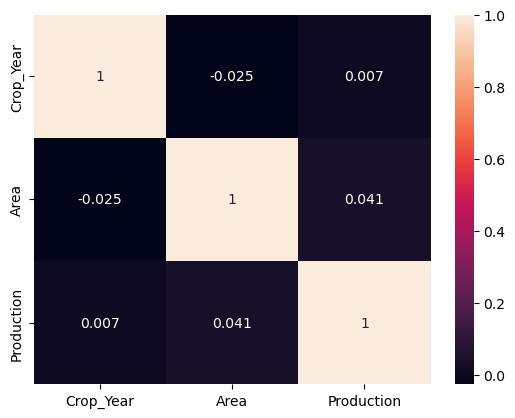

In [11]:
sns.heatmap(df.corr(numeric_only = True), annot=True)

## Exploratory Analysis & Visualization

### Univarate Analysis

In [12]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [13]:
df['State_Name'].nunique()

33

In [14]:
df.State_Name.value_counts()

State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                    

In [15]:
print(df['Crop_Year'].nunique())
print(df['Crop_Year'].min())
print(df['Crop_Year'].max())

19
1997
2015


In [16]:
df['Crop_Year'].value_counts()

Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: count, dtype: int64

In [17]:
df["Crop"].unique()


array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [18]:
df["Crop"].nunique()


124

In [19]:
df['Crop'].value_counts().head(10)

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Arhar/Tur             7476
Name: count, dtype: int64

In [20]:
print(df['Area'].max())
print(df['Area'].min())

8580100.0
0.1


In [21]:
df['Season'].unique()


array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [22]:
df['Season'].value_counts()

Season
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: count, dtype: int64

In [23]:
df['Area'].max(),df['Area'].min()

(8580100.0, 0.1)

In [24]:
df['Production'].describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

In [25]:
df['District_Name'].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [26]:
df['District_Name'].nunique()

646

# State wise Analysis

In [27]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [28]:
statewise = df[['State_Name','Area','Production']]

statewise

,State_Name,Area,Production
0,Andaman and Nicobar Islands,1254.0,2000.0
1,Andaman and Nicobar Islands,2.0,1.0
2,Andaman and Nicobar Islands,102.0,321.0
3,Andaman and Nicobar Islands,176.0,641.0
4,Andaman and Nicobar Islands,720.0,165.0
...,...,...,...
246086,West Bengal,306.0,801.0
246087,West Bengal,627.0,463.0
246088,West Bengal,324.0,16250.0
246089,West Bengal,279151.0,597899.0


In [29]:
statewise.sort_values(by = 'Area', ascending = False)

,State_Name,Area,Production
244878,West Bengal,8580100.00,7556300.00
244290,West Bengal,5544000.00,4485800.00
243654,West Bengal,5251200.00,3519600.00
244305,West Bengal,4307200.00,3632200.00
236486,West Bengal,4205800.00,3183800.00
...,...,...,...
101923,Kerala,0.29,3.00
102173,Kerala,0.28,0.02
101939,Kerala,0.24,2.00
60,Andaman and Nicobar Islands,0.20,0.50


### State wise Production 

In [30]:
statewise.sort_values(by = 'Production', ascending = False)

,State_Name,Area,Production
178273,Tamil Nadu,82704.0,1.250800e+09
178331,Tamil Nadu,84531.0,1.212000e+09
100654,Kerala,102417.0,1.125000e+09
100612,Kerala,108380.0,1.063000e+09
100149,Kerala,131061.0,1.059000e+09
...,...,...,...
116116,Madhya Pradesh,33.0,0.000000e+00
111764,Madhya Pradesh,1.0,0.000000e+00
193942,Telangana,93.0,0.000000e+00
72705,Himachal Pradesh,1.0,0.000000e+00


<Axes: xlabel='Production', ylabel='State_Name'>

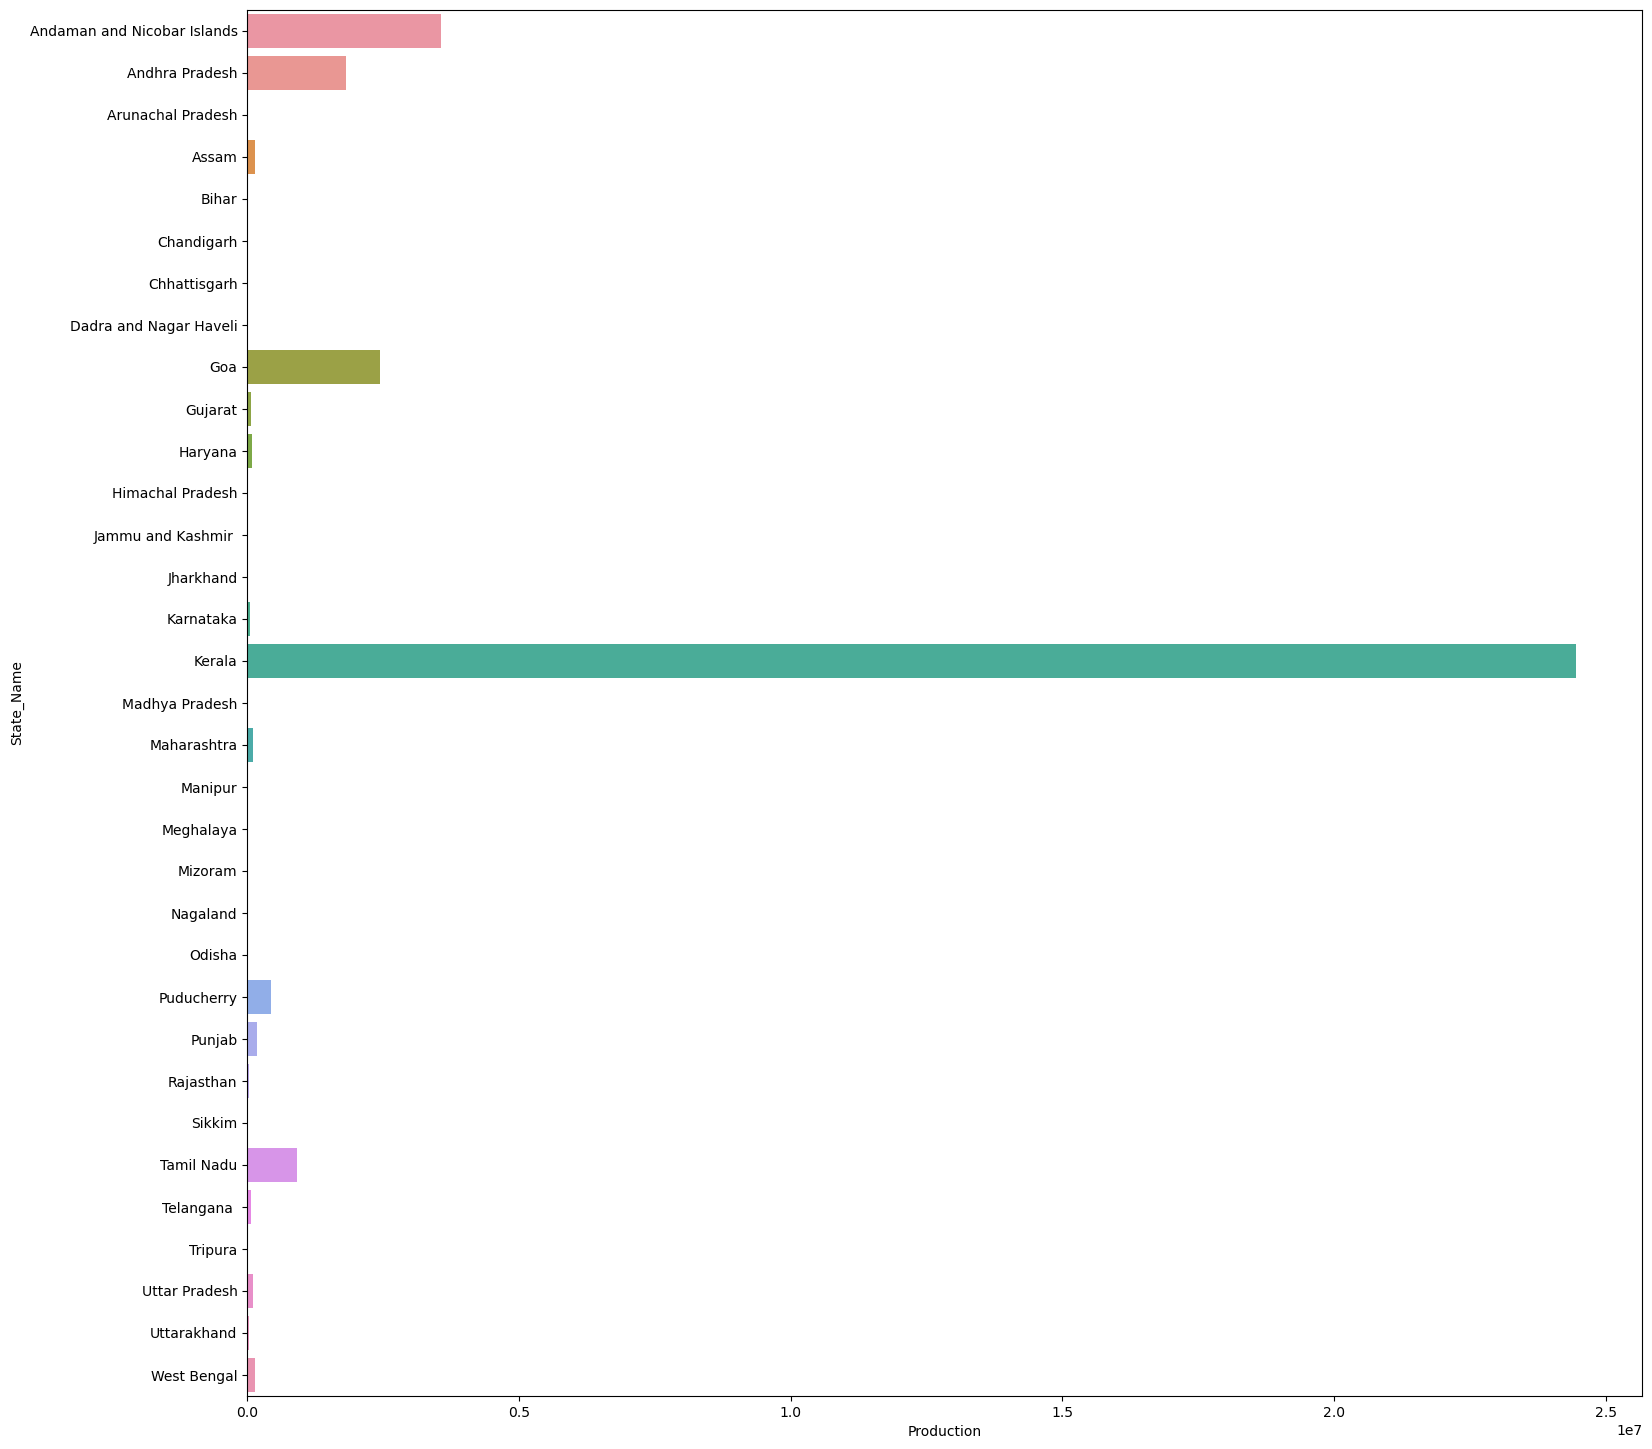

In [31]:
plt.figure(figsize= (18,18))
sns.barplot(data = statewise , x = 'Production',y = 'State_Name', errorbar = None)

### Top 10 State in Poduction

<Axes: xlabel='State_Name', ylabel='Production'>

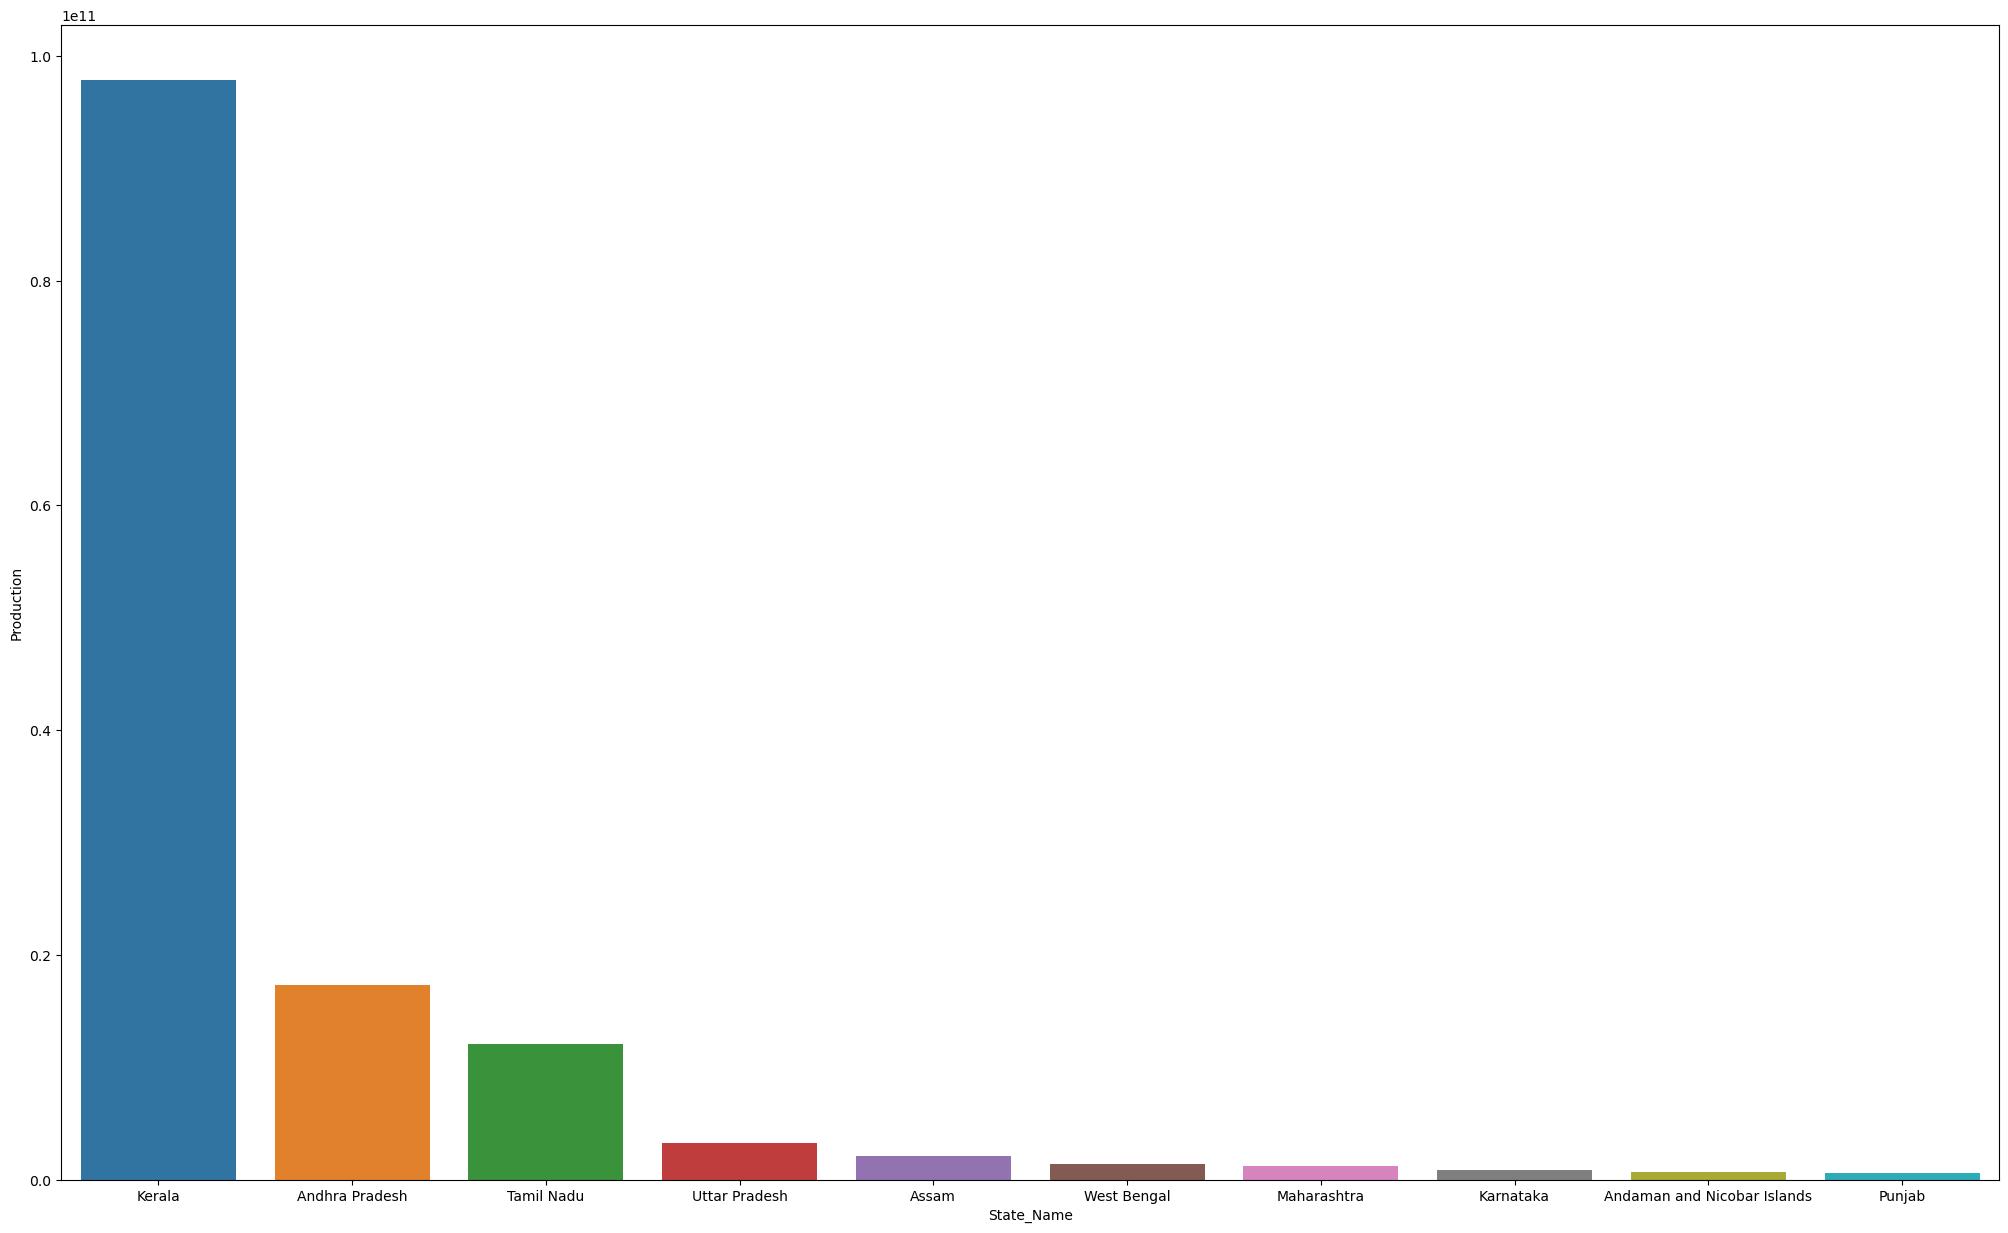

In [32]:
df1 = df.groupby(by = 'State_Name')['Production'].sum().reset_index().sort_values(by = 'Production', ascending = False)
fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(x = df1.State_Name.head(10), y = df1.Production.head(10), errwidth=0)

### State-wise Area for crop production

<Axes: xlabel='Area', ylabel='State_Name'>

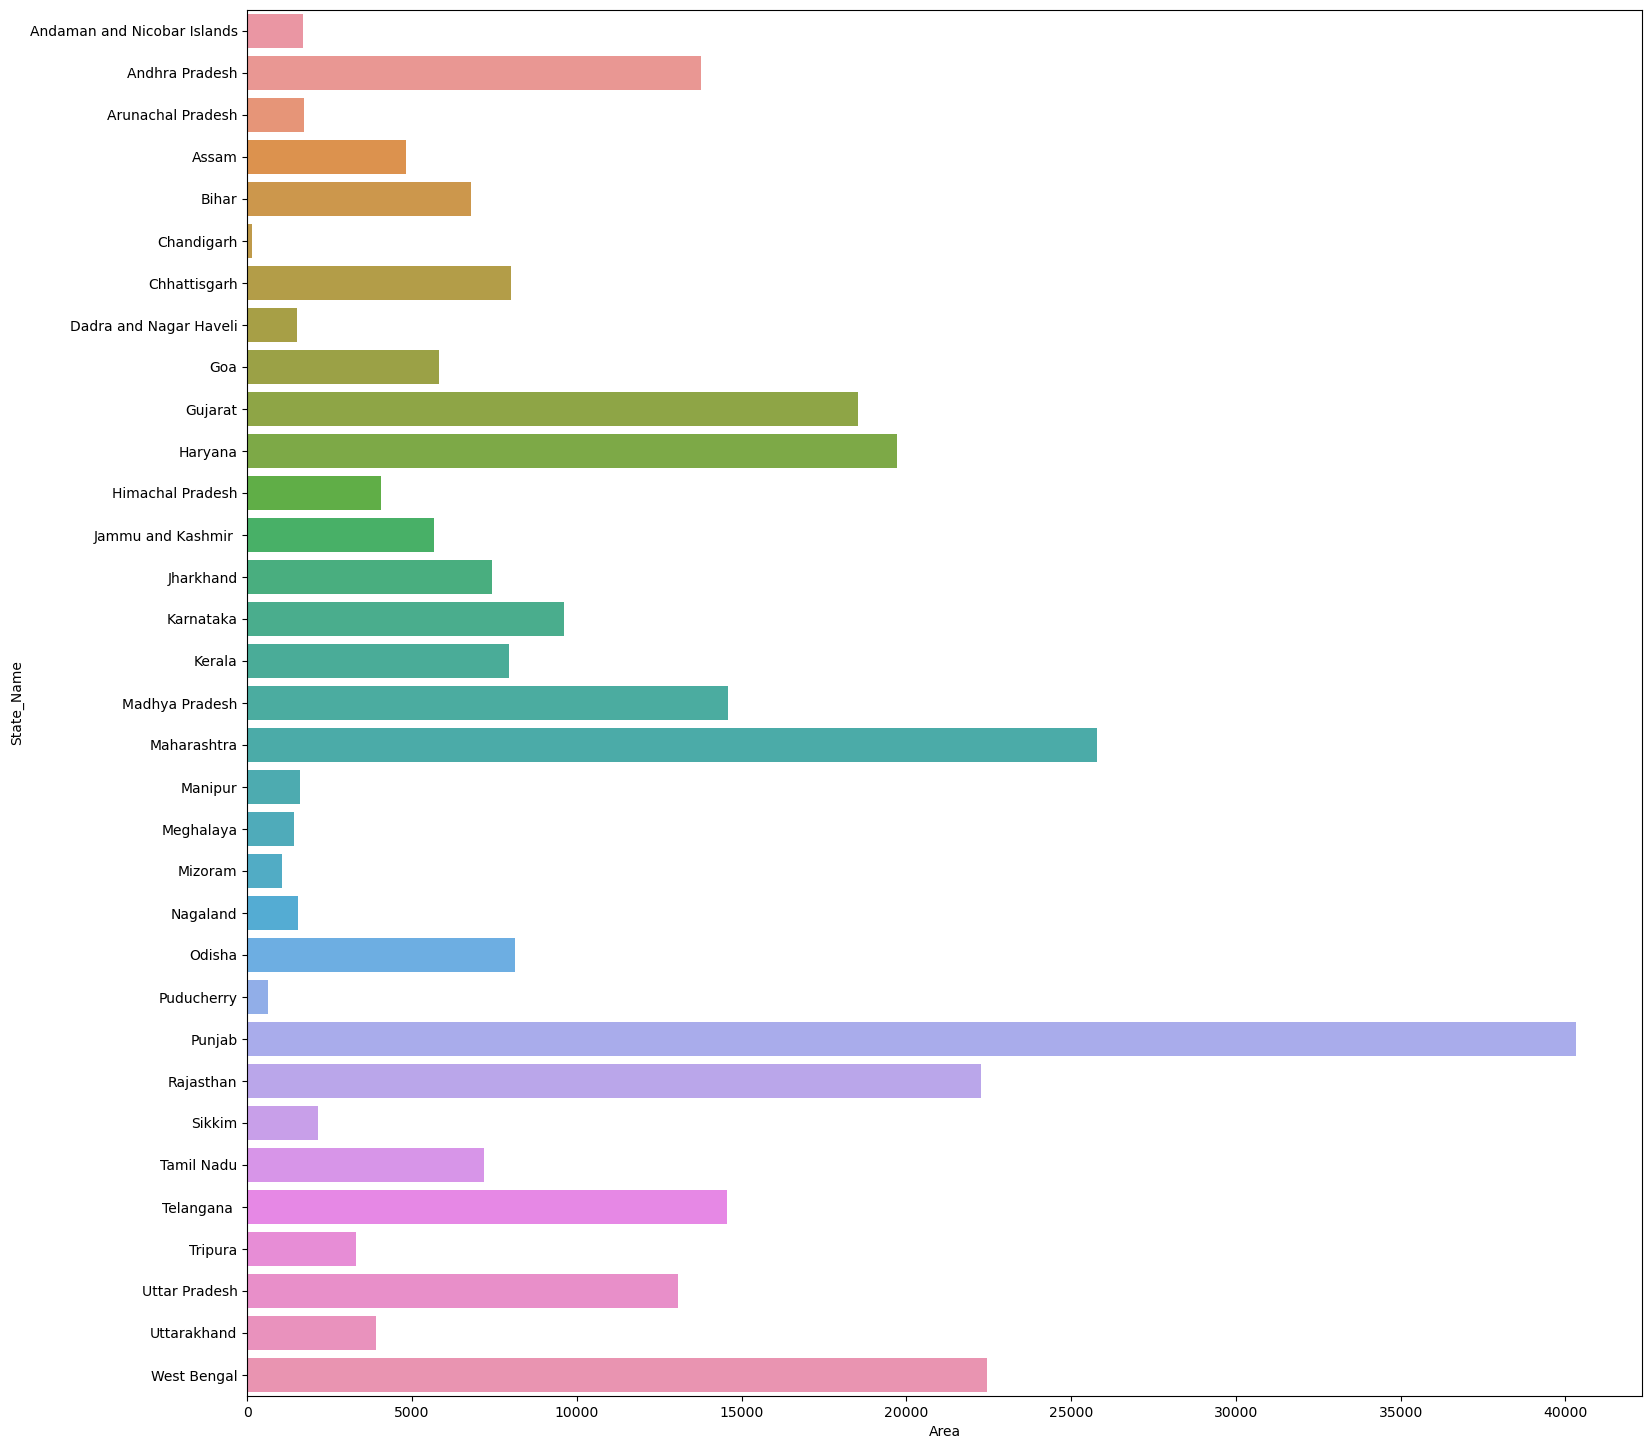

In [33]:
plt.figure(figsize= (18,18))
sns.barplot(data = statewise , x = 'Area',y = 'State_Name', errorbar = None)

### Top 10 State Area wise for crop production

<Axes: xlabel='State_Name', ylabel='Area'>

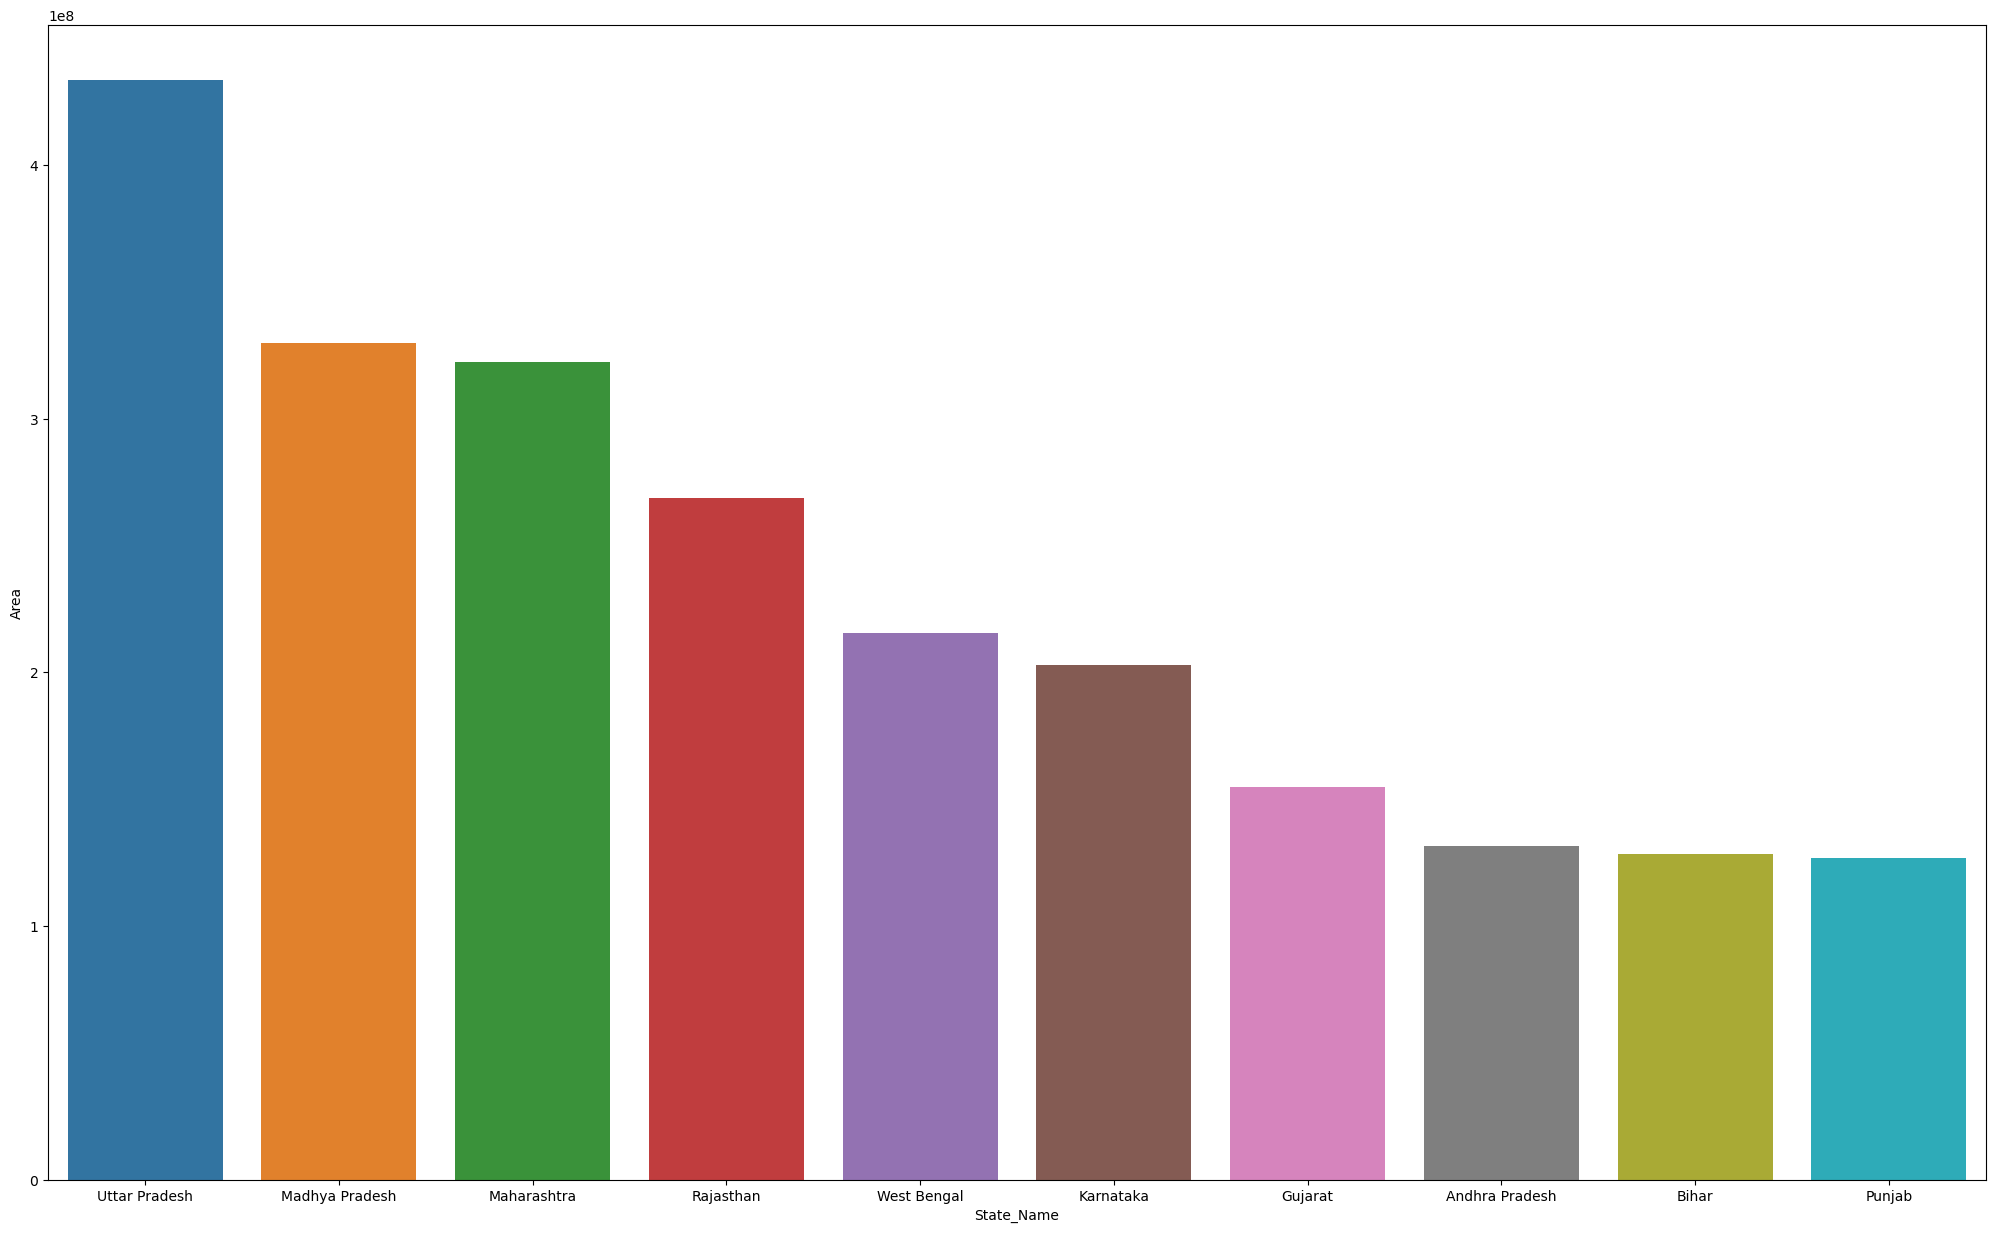

In [34]:
df1 = df.groupby(by = 'State_Name')['Area'].sum().reset_index().sort_values(by = 'Area', ascending = False)
fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(x = df1.State_Name.head(10), y = df1.Area.head(10), errwidth=0)

# Year Wise Analysis

In [36]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


Text(0.5, 1.0, 'Year wise Production')

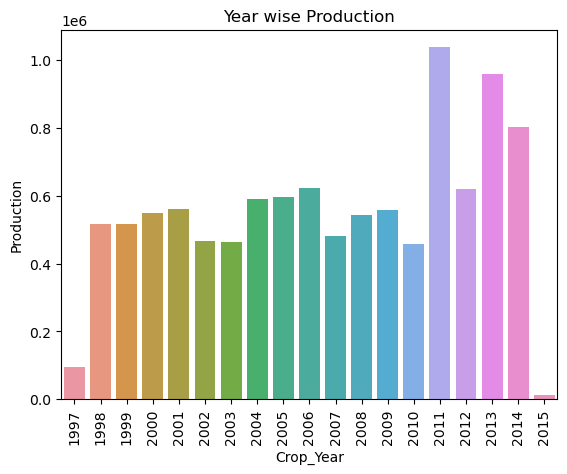

In [37]:
sns.barplot(x = df['Crop_Year'],y = df['Production'], errorbar = None)
plt.xticks(rotation = 90)
plt.title('Year wise Production')

- The production was maximum in years - 2011 and 2013

Text(0.5, 1.0, 'Year wise Area')

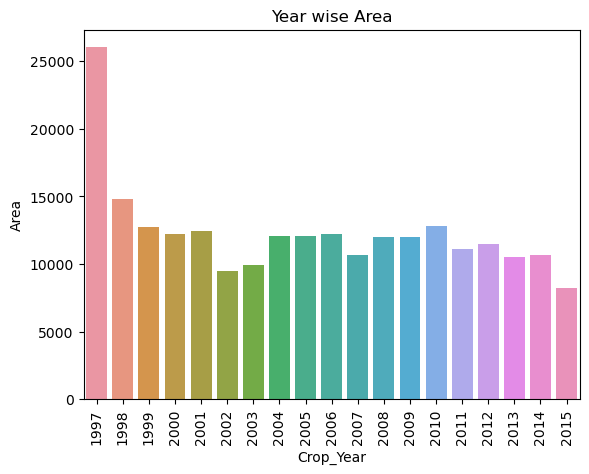

In [38]:
sns.barplot(x = df['Crop_Year'],y = df['Area'], errorbar = None)
plt.xticks(rotation = 90)
plt.title('Year wise Area')

### Production flow for each state from 1997 to 2015

C:\Users\ansh5\AppData\Local\Temp\ipykernel_25532\2499528508.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df1.State_Name.unique()),1,count)


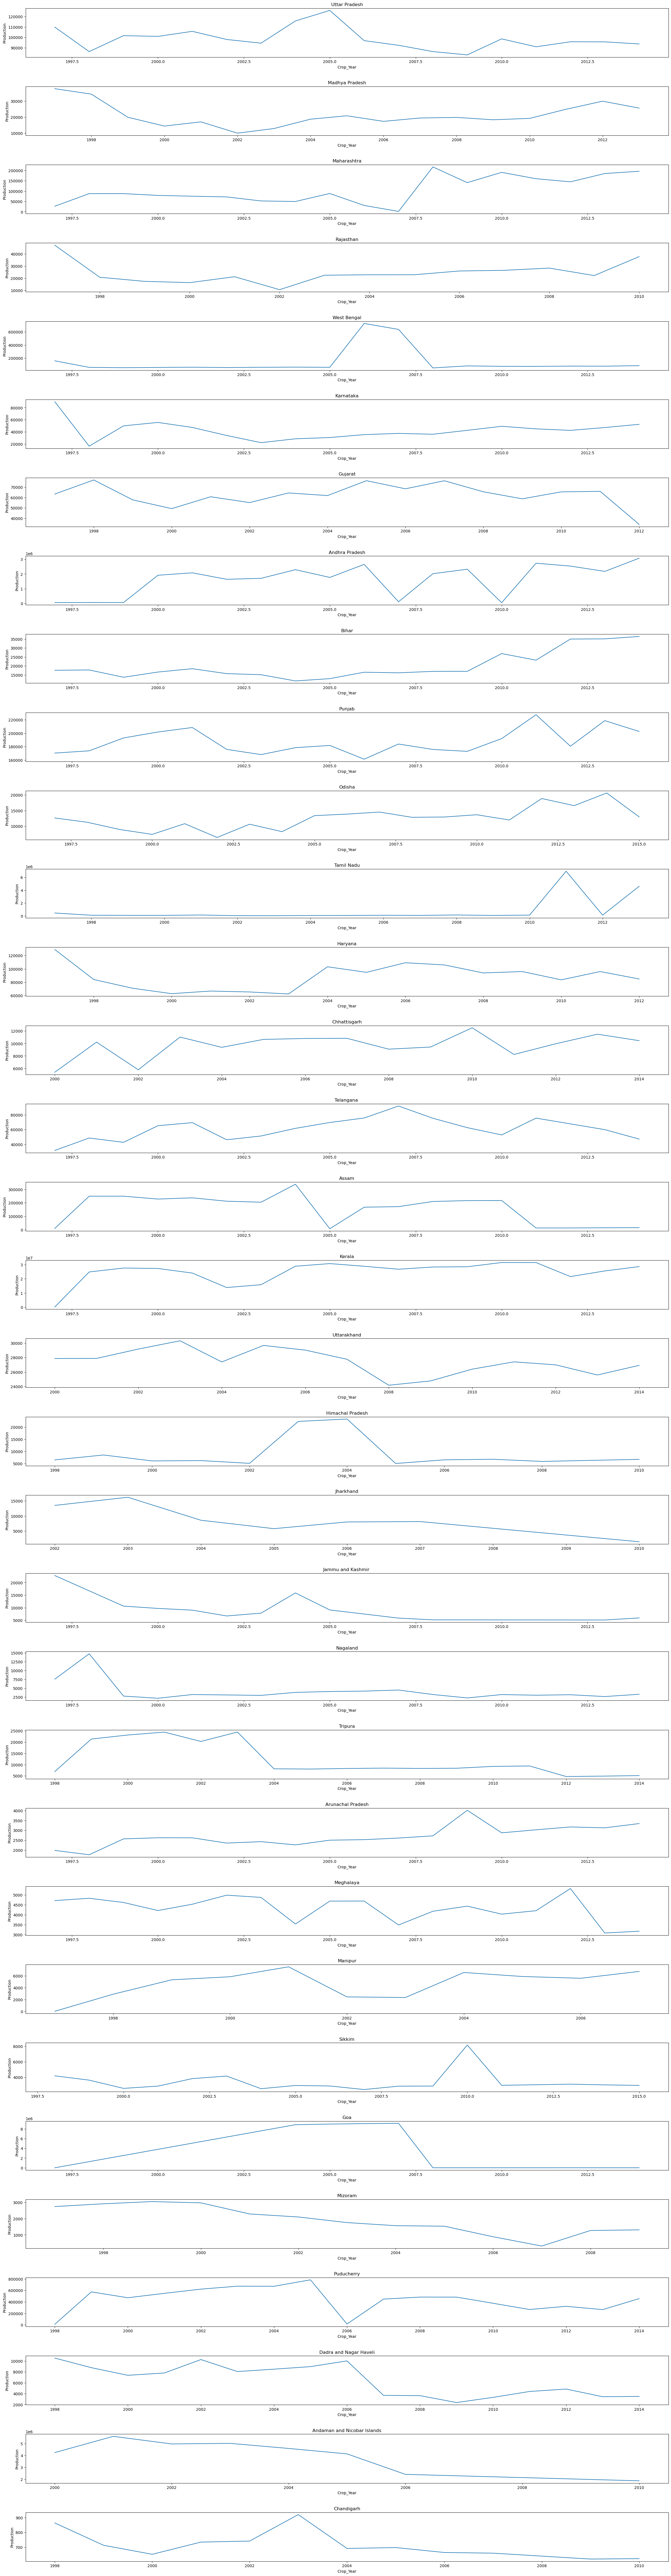

In [35]:
count = 1

fig = plt.subplots(figsize=(30,120), sharey='col')

for state in df1.State_Name.unique():

    plt.subplot(len(df1.State_Name.unique()),1,count)
    sns.lineplot(x = df[df.State_Name==state]['Crop_Year'],y = df[df.State_Name==state]['Production'] ,errorbar = None) 
    plt.subplots_adjust(hspace=0.6)
    plt.title(state)

    count +=1

#  Crop wise Production status:


<Axes: xlabel='Crop', ylabel='Production'>

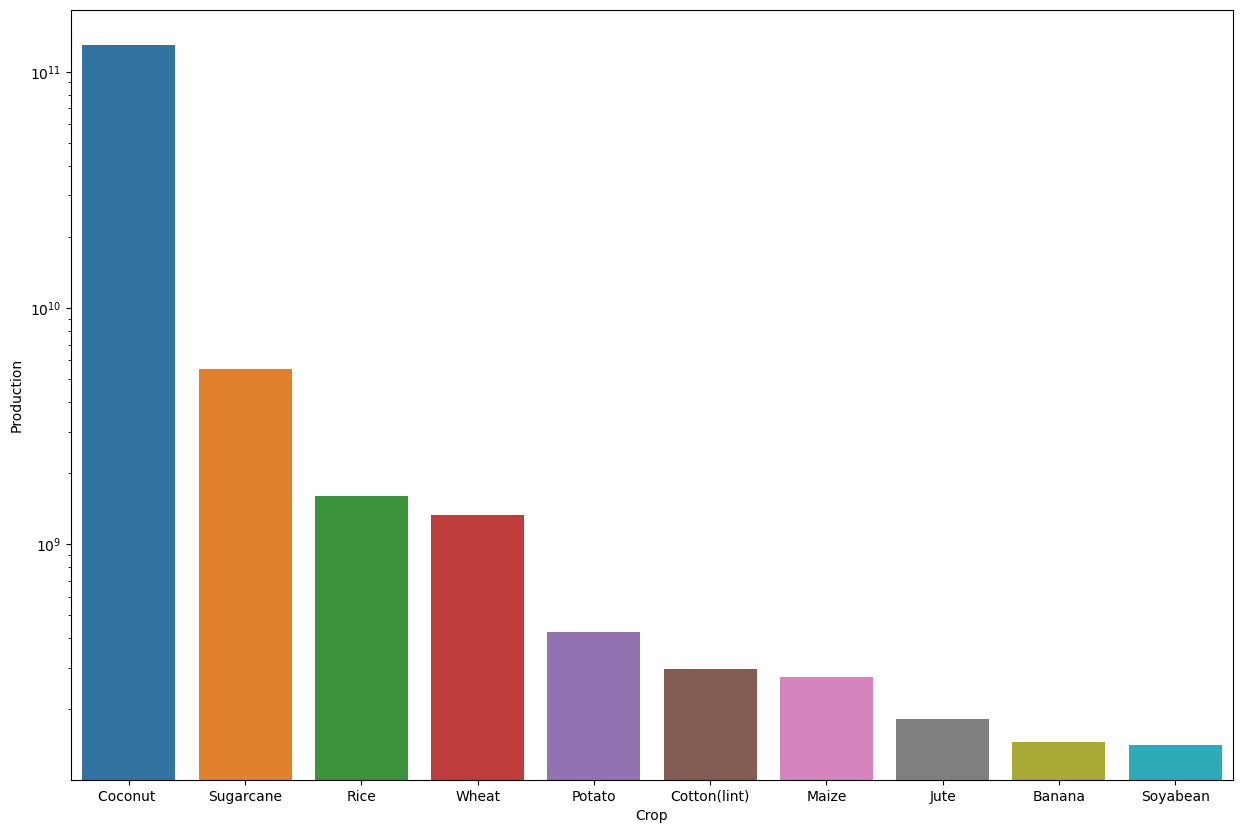

In [39]:
crop = df.groupby(by = 'Crop')['Production'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
plt.yscale('log')
sns.barplot(x = crop.Crop, y = crop.Production,errwidth=0)

- The crops with maximum production are: Coconut, Sugarcane, Rice

In [40]:
crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['cat_crop']=df['Crop'].apply(cat_crop)

In [41]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


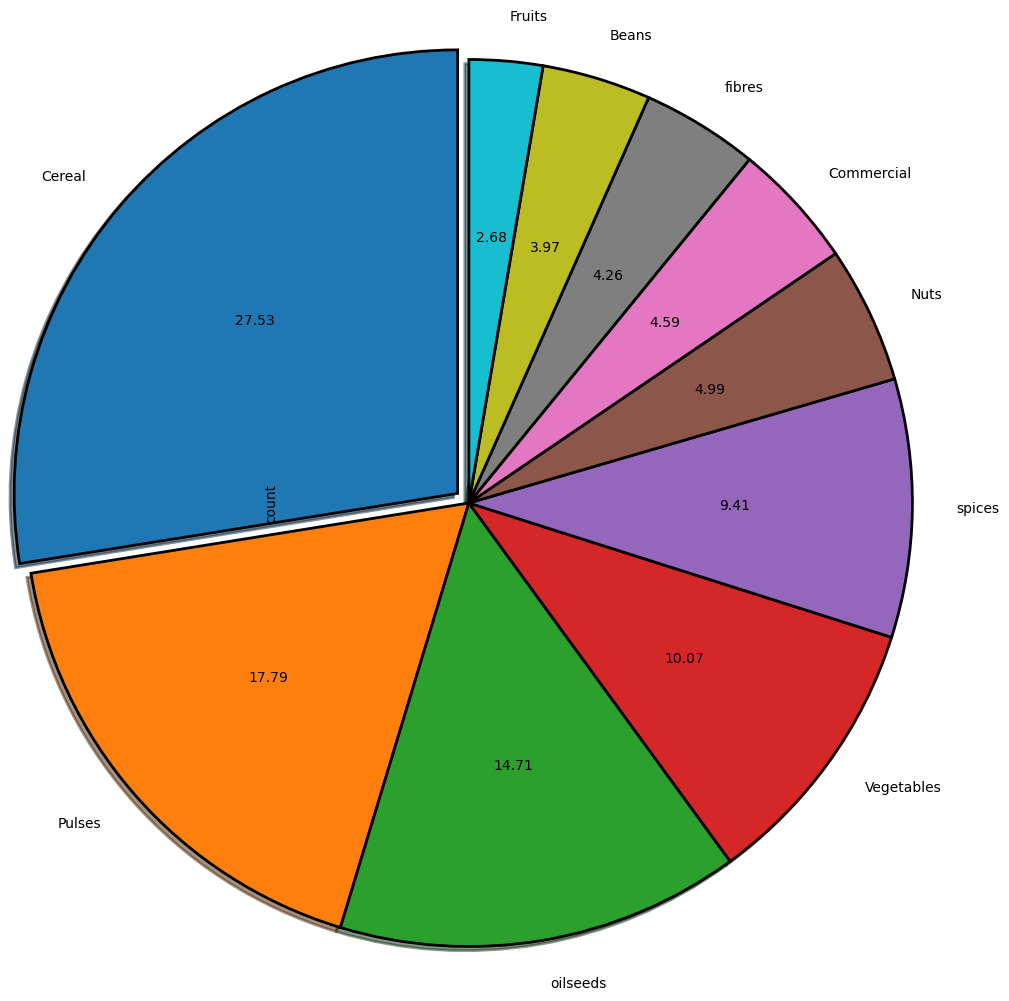

In [42]:
explode = [.1,0,0,0,0,0,0,0,0,0]

df1=df["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.2f",pctdistance=.6, explode = explode,startangle=90, 
         shadow = True,
         wedgeprops = {'edgecolor':'black', 'linewidth': 2})
plt.tick_params(labelsize=10)

Top producing crop categories are 
- Cereals - 27.53%
- Pulses - 17.79%
- Oilseeds - 14.71%
- vegetables - 10.07%
- spices - 9.41%

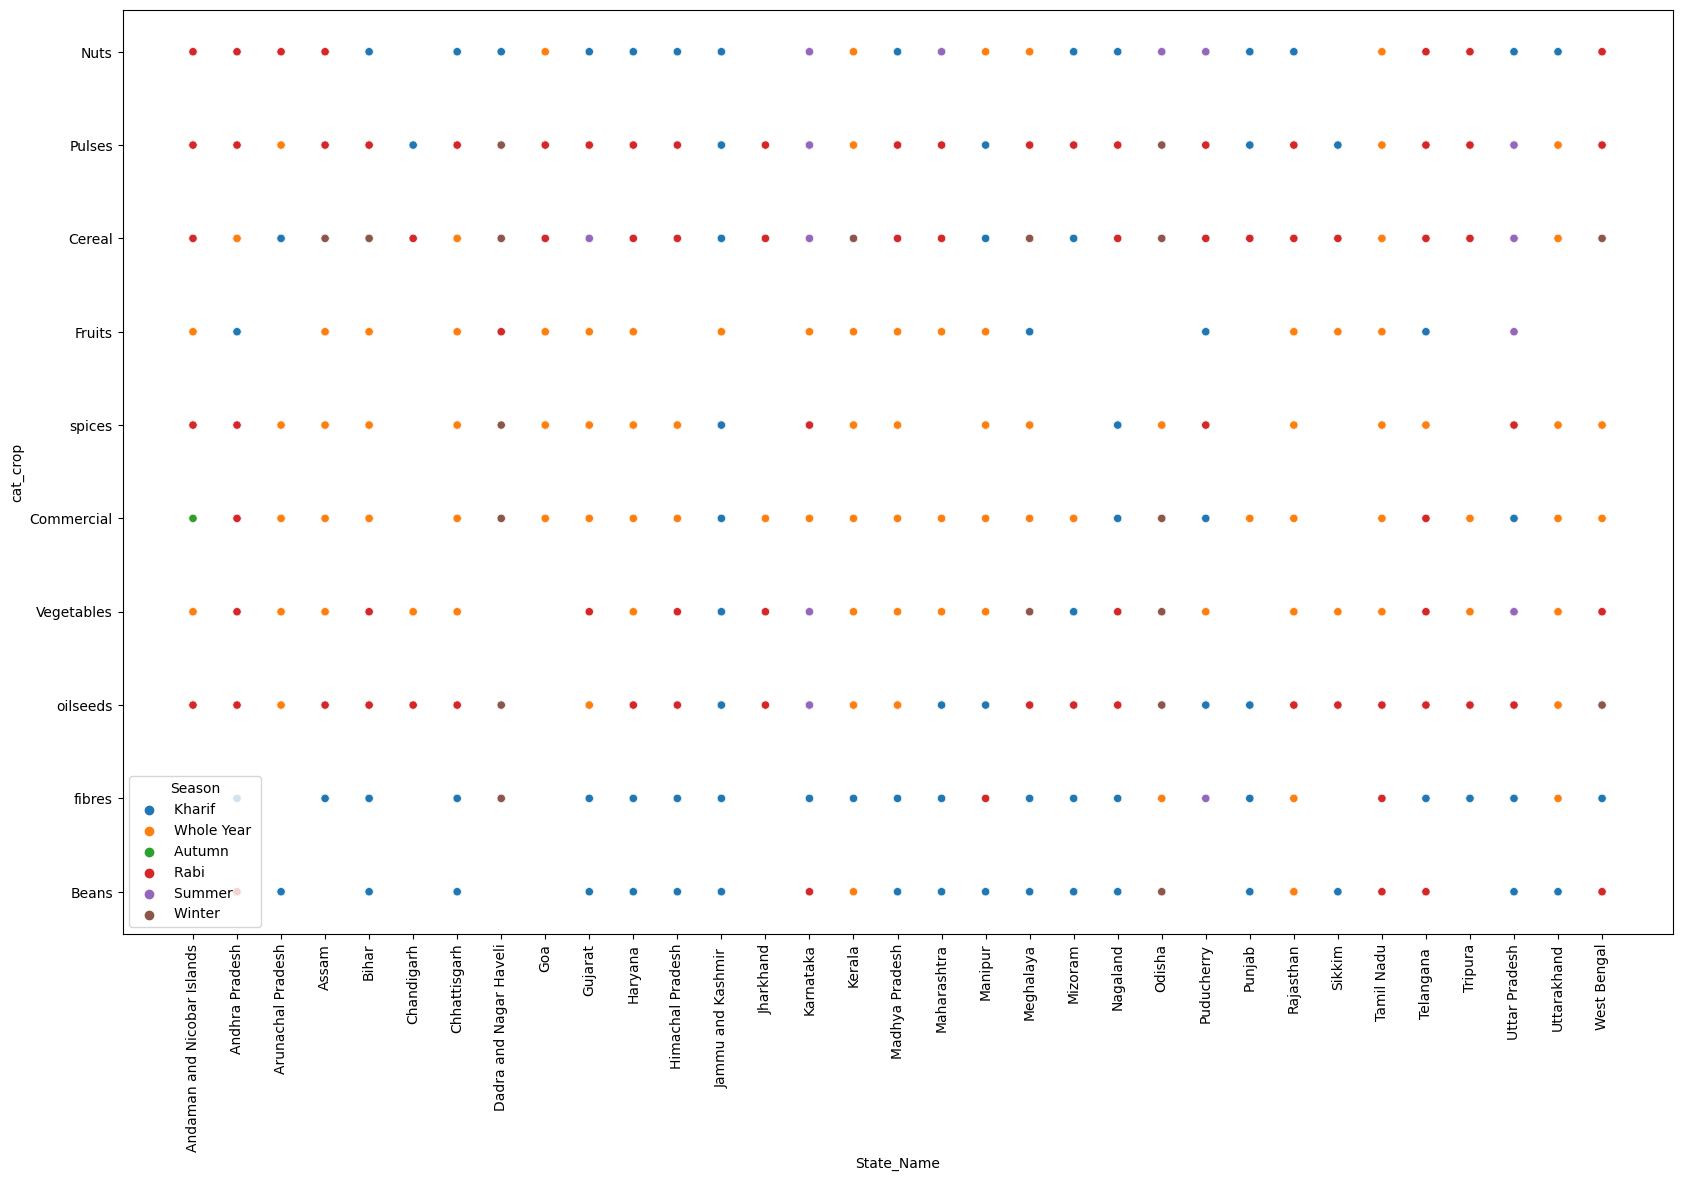

In [43]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=df,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Seasonal Crops vs Production')

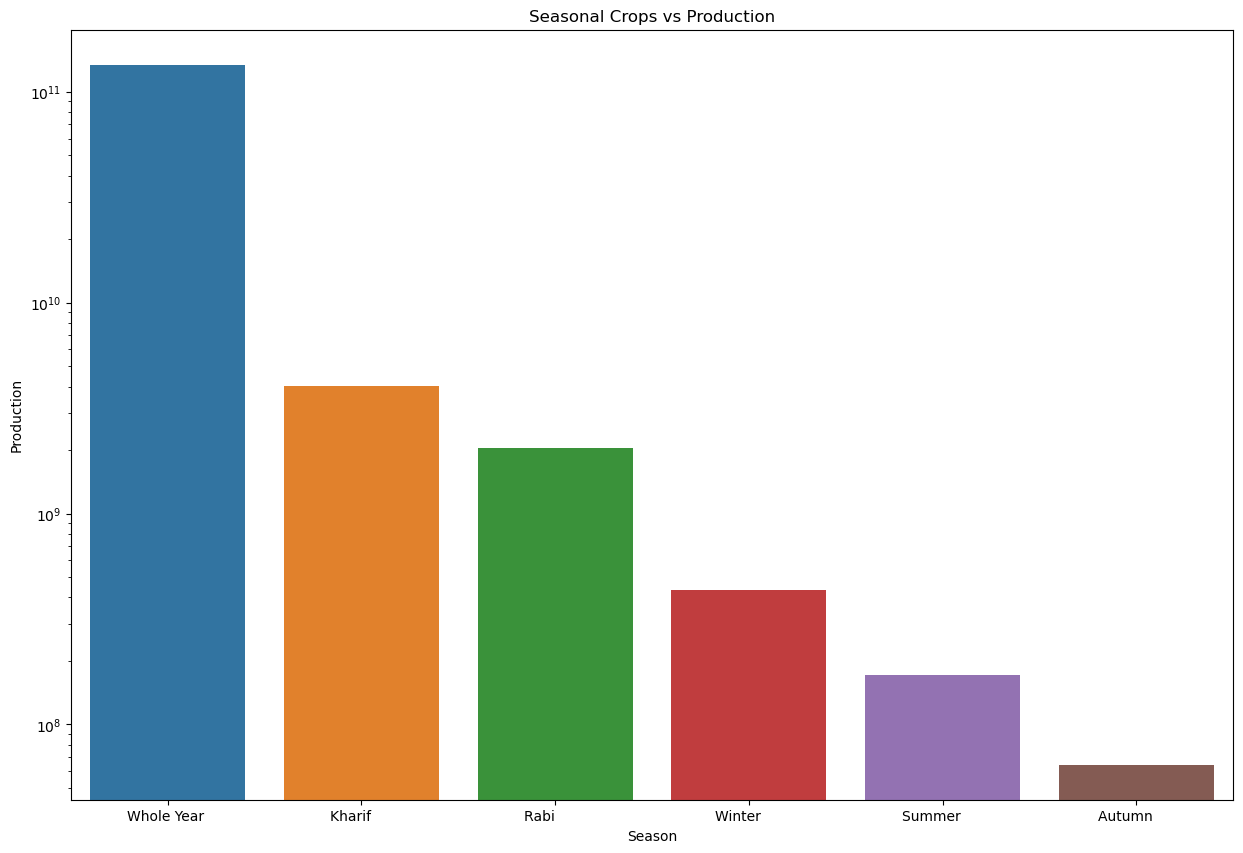

In [44]:

season = df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = season.Season, y = season.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

- Top crop categories which shows high production values are Whole Year(Annual growing plants), Kharif and Rabi crops.
- These crop are generally dependent on monsoons.

In [45]:
StateWiseCat_Crop = pd.crosstab(df['State_Name'], df['cat_crop'])
StateWiseCat_Crop

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


<Axes: xlabel='State_Name'>

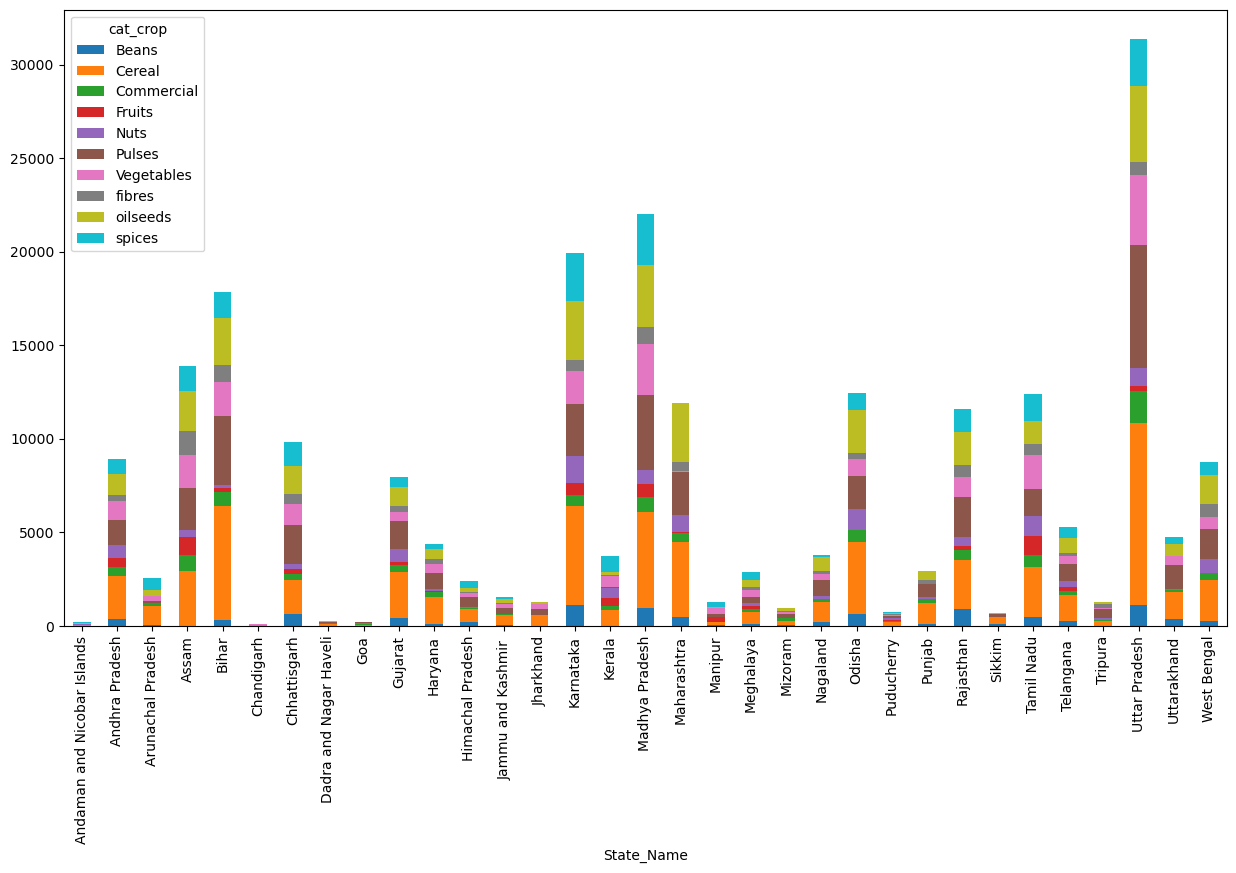

In [46]:
StateWiseCat_Crop.plot(kind = 'bar', stacked = True, figsize = (15,8) )

In [47]:
dist = df.groupby(by = 'District_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
dist

,District_Name,Production
334,KOZHIKODE,1.528074e+10
372,MALAPPURAM,1.451840e+10
587,THIRUVANANTHAPURAM,1.002271e+10
590,THRISSUR,9.923508e+09
286,KANNUR,9.783432e+09
172,EAST GODAVARI,8.271057e+09
298,KASARAGOD,7.732217e+09
326,KOLLAM,7.151945e+09
437,PALAKKAD,6.369382e+09
178,ERNAKULAM,5.021649e+09


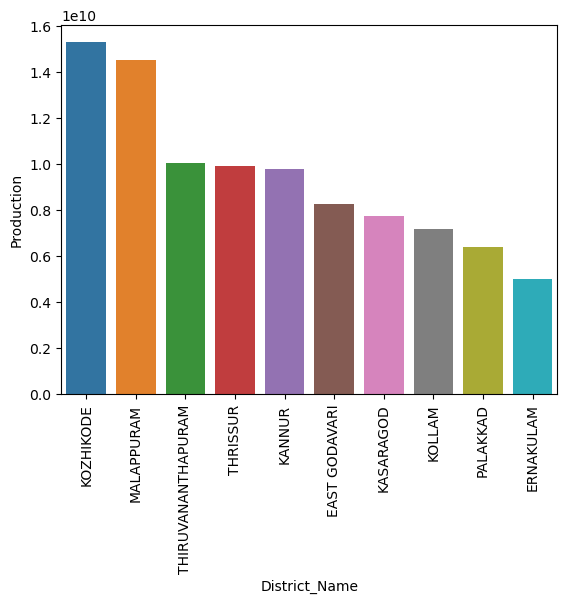

In [48]:
sns.barplot(data = dist, x = 'District_Name', y = 'Production' )
plt.xticks(rotation=90)
plt.show()

### Visualisation of Data
1. State wise Production
2. Crop wise Production
3. Year wise Production
4. Season wise Production
5. Crop Category wise Production
6. Different Proportion of crop Categories


## Questions and Answers
### 1. Which Crop is seen in high frequency and when and where is it grown in India?

- Rice is observed to have the highest frequency.
- Rice is primarily cultivated in Winter.
- State-wise, Punjab leads in rice production.
- District-wise, BARDHAMAN (2.13%), MEDINIPUR WEST (1.8%), and WEST GODAVARI   (1.73%) are the top contributors to total rice production.
- Year-wise, 2004 saw the peak in rice production.

### 2. Which states rank high in area-wise crop production in India? Substantiate with facts and figures.

- The top states based on cultivation area are: Uttar Pradesh, Madhya Pradesh, Maharashtra, Rajasthan, and West Bengal.
Year-wise trends for these states:
- Uttar Pradesh: High production was observed in 2005, followed by a gradual decline.
- Madhya Pradesh: 1998 showed high production, followed by a decline, but it picked up again with a peak in 2012.
- Maharashtra: Production drastically dropped in 2006, then increased, peaking after 2007.
- Rajasthan: Production hit a low in 2002, then increased, reaching a peak by 2010.
- West Bengal: Production peaked around 2006 but declined after 2007 and has not recovered since.

### 3. Find the most efficient state (in terms of most production per unit area). Also, find the most efficient state for some of the crop categories.

The most efficient states in terms of production per unit area are Puducherry, Kerala, and Punjab.
The most efficient states in terms of production per unit area for various crop categories are:
- Cereals: Chandigarh
- Pulses: Kerala
- Fruits: Gujarat
- Vegetables: Gujarat
- Fibres: West Bengal